In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.spatial.distance import cdist

In [2]:
test = pd.read_csv("test (1).csv")
train = pd.read_csv("train (1).csv")

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,Q,S,1,2,3,4,5,6
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,A/5 21171,7.2500,NaN,0,1,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,PC 17599,71.2833,C85,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,113803,53.1000,C123,0,1,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,373450,8.0500,NaN,0,1,0,0,0,0,0,0


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
# turn sex into boolean
train['Sex'] = train['Sex'].apply({'male':0, 'female':1}.get)
test['Sex'] = test['Sex'].apply({'male':0, 'female':1}.get)

In [6]:
# dummy variables for 'embarked'
train['Embarked'].unique()
df_dummy = pd.get_dummies(train['Embarked'])
df_dummy = df_dummy.drop(columns = 'C')
frames = [train, df_dummy]
train = pd.concat(frames, axis = 1)
train = train.drop(columns = 'Embarked')
train.head()

test['Embarked'].unique()
df_dummy = pd.get_dummies(test['Embarked'])
df_dummy = df_dummy.drop(columns = 'C')
frames = [test, df_dummy]
test = pd.concat(frames, axis = 1)
test = test.drop(columns = 'Embarked')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Q,S
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,1


In [7]:
# dummy variables for 'Parch'

train['Parch'].unique()
df_dummy = pd.get_dummies(train['Parch'])
df_dummy = df_dummy.drop(columns = 0)
frames = [train, df_dummy]
train = pd.concat(frames, axis = 1)
train = train.drop(columns = 'Parch')
train.head()

test['Parch'].unique()
df_dummy = pd.get_dummies(test['Parch'])
df_dummy = df_dummy.drop(columns = 0)
frames = [test, df_dummy]
test = pd.concat(frames, axis = 1)
test = train.drop(columns = 'Parch')
test.head()

KeyError: "['Parch'] not found in axis"

In [9]:
train['Age'].unique()
avg_age = np.mean(train['Age'])
values = {'Age':avg_age}
train.fillna(value=values, inplace = True)
train.info()

avg_age = np.mean(test['Age'])
values = {'Age':avg_age}
test.fillna(value=values, inplace = True)
test.info()

avg_fare = np.mean(test['Fare'])
values = {'Fare':avg_fare}
test.fillna(value=values, inplace = True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Q              891 non-null uint8
S              891 non-null uint8
1              891 non-null uint8
2              891 non-null uint8
3              891 non-null uint8
4              891 non-null uint8
5              891 non-null uint8
6              891 non-null uint8
dtypes: float64(2), int64(5), object(3), uint8(8)
memory usage: 76.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null ob

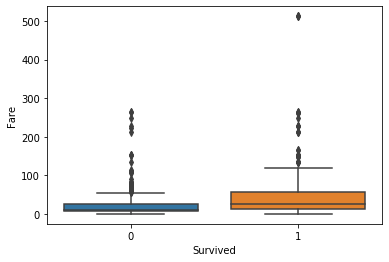

In [10]:
sns.boxplot(train['Survived'], train['Fare'])

In [11]:
# Features
features = list(train.columns)
features.remove('PassengerId')
features.remove('Survived')
features.remove('Name')
features.remove('SibSp')
features.remove('Ticket')
features.remove('Cabin')
features

['Pclass', 'Sex', 'Age', 'Fare', 'Q', 'S', 1, 2, 3, 4, 5, 6]

In [12]:
# logistic regression (initial model)
X = train.loc[:, features]
y = train.loc[:,'Survived']

X_test = test.loc[:, features]



lr = LogisticRegression()
lr.fit(X, y) 
predictions = lr.predict(X)
print(classification_report(y, predictions))
print('\n')
print(pd.crosstab(y, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True))

predictions_test = lr.predict(X_test)
df_pred = pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':predictions_test})
df_pred

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       549
           1       0.75      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.78       891
weighted avg       0.79      0.80      0.79       891



Predicted    0    1  All
Actual                  
0          469   80  549
1          102  240  342
All        571  320  891


/Users/KevinSun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [13]:
avg_fare = np.mean(test['Fare'])
values = {'Fare':avg_fare}
test.fillna(value=values, inplace = True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Q              418 non-null uint8
S              418 non-null uint8
1              418 non-null uint8
2              418 non-null uint8
3              418 non-null uint8
4              418 non-null uint8
5              418 non-null uint8
6              418 non-null uint8
9              418 non-null uint8
dtypes: float64(2), int64(5), object(3), uint8(9)
memory usage: 36.4+ KB


In [14]:
#csv files with predictions
titanic_lr = df_pred.to_csv('titanic_lr', index = False)

In [15]:
#decision tree
clf = DecisionTreeClassifier(criterion='entropy',max_depth = 4)
clf.fit(X,y)
predictions = clf.predict(X)
print(classification_report(y, predictions))
print('\n')
print(pd.crosstab(y, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True))

predictions_test = clf.predict(X_test)
df_pred2 = pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':predictions_test})
titanic_dt = df_pred2.to_csv('titanic_dt', index = False)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       549
           1       0.83      0.72      0.77       342

    accuracy                           0.84       891
   macro avg       0.83      0.81      0.82       891
weighted avg       0.83      0.84      0.83       891



Predicted    0    1  All
Actual                  
0          498   51  549
1           96  246  342
All        594  297  891


In [16]:
# random forests
forest = RandomForestClassifier(n_estimators = 100, max_depth = 5)
forest.fit(X,y)
forest.score(X,y)
forest_pred = forest.predict(X_test)
print(classification_report(y,forest.predict(X)))
df_pred3 = pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':forest_pred})
titanic_rf = df_pred3.to_csv('titanic_rf', index = False)

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       549
           1       0.88      0.70      0.78       342

    accuracy                           0.85       891
   macro avg       0.86      0.82      0.83       891
weighted avg       0.85      0.85      0.84       891



In [17]:
forest2 = RandomForestClassifier(n_estimators = 100, max_depth = 10, max_features = 4)
forest2.fit(X,y)
forest2.score(X,y)
forest2_pred = forest2.predict(X_test)
df_pred4 = pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':forest2_pred})
titanic_rf3 = df_pred4.to_csv('titanic_rf3', index = False)
forest2.score(X,y)

0.9382716049382716

In [18]:
#gradiant boost
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X,y)
gb.score(X,y)
gb_pred = gb.predict(X_test)
df_pred5 = pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':gb_pred})
titanic_gb = df_pred5.to_csv('titanic_gb', index = False)
gb.score(X,y)

0.8832772166105499

In [19]:
#adaptive boost
ada_boost = AdaBoostClassifier(random_state=42)
ada_boost.fit(X,y)
ada_boost_pred = ada_boost.predict(X_test)
df_pred6 = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':gb_pred})
titanic_ada = df_pred6.to_csv('titanic_ada',index=False)
ada_boost.score(X,y)

0.8271604938271605

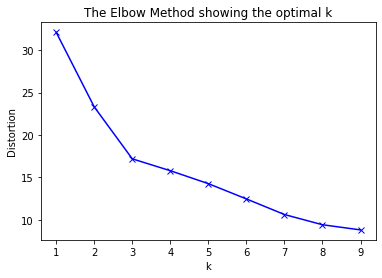

In [40]:

x = train[features]
x_test = test[features]
#elbow plot for clustering
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(x)
    kmeanModel.fit(x)
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [42]:
#Clustering
kmeans_model = KMeans(n_clusters=3, random_state=1)
kmeans_model.fit(x)
train['cluster'] = kmeans_model.labels_ 

kmeans_model.fit(x_test)
test['cluster'] = kmeans_model.labels_

In [43]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Q,S,1,2,3,4,5,6,9,cluster
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,1,0,0,0,0,0,0,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,1,0,0,0,0,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,1,0,0,0,0,0,0,0,0,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,1,0,0,0,0,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,1,1,0,0,0,0,0,0,1


In [48]:
train['cluster'].value_counts()

2    729
0    142
1     20
Name: cluster, dtype: int64

In [80]:
# logistic regression on each cluster
X = train.loc[:, features]
y = train.loc[:,'Survived']

X_test = test.loc[:, features]

lr = LogisticRegression()
#empty_df = pd.DataFrame(columns=['PassengerId', 'Survived'])
empty_df = []
for i in [0,1,2]:
    X = train.loc[train['cluster'] == i, features]
    y = train.loc[train['cluster'] == i, 'Survived']
    lr.fit(X,y)
    predictions = lr.predict(X)
    print(i)
    print(classification_report(y, predictions))
    print('\n')
    print(pd.crosstab(y, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True))
    X_test = test.loc[test['cluster'] == i, features]
    predictions_test = lr.predict(X_test)
    df_pred = pd.DataFrame({'PassengerId':test.loc[test['cluster'] == i]['PassengerId'],
                            'Survived':predictions_test})
    empty_df.append(df_pred)

df_pred7 = pd.concat([empty_df[0],empty_df[1],empty_df[2]])
clustered_lr = df_pred7.to_csv('clustered_lr',index=False)


/Users/KevinSun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/KevinSun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/KevinSun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0
              precision    recall  f1-score   support

           0       0.64      0.79      0.70        47
           1       0.88      0.78      0.83        95

    accuracy                           0.78       142
   macro avg       0.76      0.78      0.77       142
weighted avg       0.80      0.78      0.79       142



Predicted   0   1  All
Actual                
0          37  10   47
1          21  74   95
All        58  84  142
1
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.93      1.00      0.97        14

    accuracy                           0.95        20
   macro avg       0.97      0.92      0.94        20
weighted avg       0.95      0.95      0.95        20



Predicted  0   1  All
Actual               
0          5   1    6
1          0  14   14
All        5  15   20
2
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       496
  

In [83]:
X = train.loc[:, features]
y = train.loc[:,'Survived']

X_test = test.loc[:, features]

forest = RandomForestClassifier(n_estimators = 100, max_depth = 5)
#empty_df = pd.DataFrame(columns=['PassengerId', 'Survived'])
empty_df = []
for i in [0,1,2]:
    X = train.loc[train['cluster'] == i, features]
    y = train.loc[train['cluster'] == i, 'Survived']
    forest.fit(X,y)
    predictions = forest.predict(X)
    print(i)
    #print(classification_report(y, predictions))
    #print('\n')
    print(pd.crosstab(y, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True))
    X_test = test.loc[test['cluster'] == i, features]
    predictions_test = forest.predict(X_test)
    df_pred = pd.DataFrame({'PassengerId':test.loc[test['cluster'] == i]['PassengerId'],
                            'Survived':predictions_test})
    empty_df.append(df_pred)

df_pred7 = pd.concat([empty_df[0],empty_df[1],empty_df[2]])
df_pred7
#clustered_forest = df_pred7.to_csv('clustered_forest',index=False)


0
Predicted   0   1  All
Actual                
0          44   3   47
1           3  92   95
All        47  95  142
1
Predicted  0   1  All
Actual               
0          6   0    6
1          0  14   14
All        6  14   20
2
Predicted    0    1  All
Actual                  
0          474   22  496
1           94  139  233
All        568  161  729


,PassengerId,Survived
24,916,1
53,945,1
59,951,1
64,956,1
69,961,1
74,966,1
75,967,0
81,973,1
114,1006,1
142,1034,0


In [61]:
test.loc[test['cluster'] == i]["PassengerId"]

12      904
14      906
20      912
23      915
26      918
34      926
39      931
44      936
48      940
50      942
92      984
96      988
100     992
118    1010
122    1014
139    1031
141    1033
146    1038
150    1042
166    1058
177    1069
179    1071
181    1073
182    1074
188    1080
196    1088
212    1104
230    1122
234    1126
236    1128
       ... 
245    1137
252    1144
270    1162
272    1164
287    1179
293    1185
306    1198
308    1200
314    1206
316    1208
327    1219
342    1234
350    1242
352    1244
353    1245
356    1248
360    1252
364    1256
365    1257
368    1260
371    1263
374    1266
378    1270
385    1277
390    1282
395    1287
397    1289
402    1294
411    1303
414    1306
Name: PassengerId, Length: 62, dtype: int64

,PassengerId,Survived
